In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_allclose

ЗАДАЧА 1


In [2]:
def gauss_2(a, b):
    x1 = (a + b) / 2 - (b - a) / 2 * np.sqrt(1/3)
    x2 = (a + b) / 2 + (b - a) / 2 * np.sqrt(1/3)
    w1 = (b - a) / 2
    w2 = (b - a) / 2
    return x1, x2, w1, w2


x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

ЗАДАЧА 2

In [3]:
def integ(npts=10):
    h = 1.0 / npts
    x = np.linspace(0, 1, npts, endpoint=False)
    x[0] = 1e-15
    f_reg = (np.exp(x) - (x * (np.exp(1) - 1) + 1)) / np.sqrt(x * (1 - x))
    trap = h * np.sum(f_reg)
    return trap + np.pi * (np.exp(1) - 1)

I = integ(npts=50)
print("Вычисленное значение интеграла I =", I)

Вычисленное значение интеграла I = 5.06691679707731


ЗАДАЧА 5

k    Exact           Simpson         Poly (deg=2)      Poly (deg=3)
5    0.200618061205  0.200618061267  0.200618061200  0.200618061200  
10   0.094731295221  0.094731295724  0.094731295206  0.094731295218  
20   0.047720004077  0.047720008190  0.047720004046  0.047720004070  
50   0.019128070407  0.019128135241  0.019128070328  0.019128070389  
200  0.004783810813  0.004788155742  0.004783810450  0.004783810734  
2000 0.000478392921  0.000000000000  0.000478393041  0.000478392947  


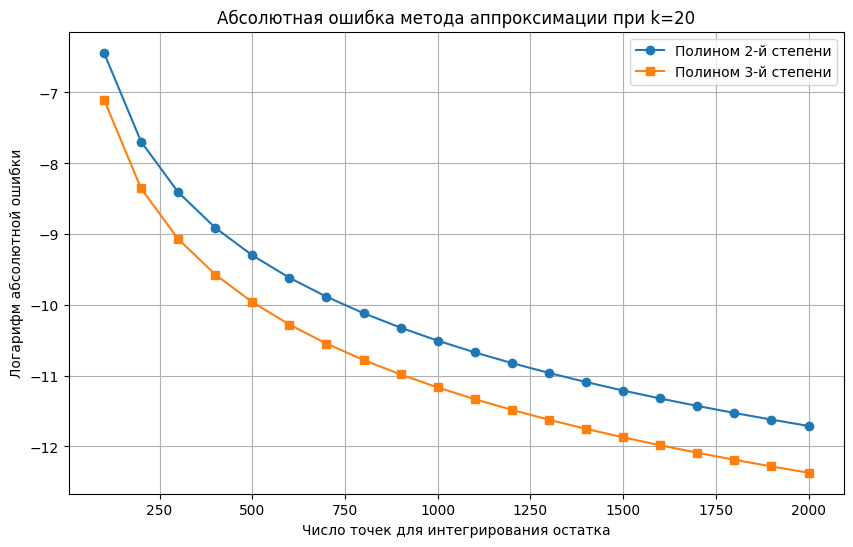

In [4]:
def calc_I0(k):
    return (1 - np.cos(k * np.pi)) / k

def calc_I1(k):
    return (-k * np.pi * np.cos(k * np.pi) + np.sin(k * np.pi)) / (k**2)

def calc_I2(k):
    return (-2 + (2 - k**2 * np.pi**2) * np.cos(k * np.pi) + 2 * k * np.pi * np.sin(k * np.pi)) / (k**3)

def calc_I3(k):
    return (k * np.pi * (6 - k**2 * np.pi**2) * np.cos(k * np.pi) + 3 * (-2 + k**2 * np.pi**2) * np.sin(k * np.pi)) / (k**4)

def calc_exact_integral(k):
    return (k - np.exp(-np.pi) * (k * np.cos(k * np.pi) + np.sin(k * np.pi))) / (1 + k**2)

def func(x, k):
    return np.exp(-x) * np.sin(k * x)

def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n должно быть четным")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h/3 * (y[0] + 2*np.sum(y[2:-1:2]) + 4*np.sum(y[1::2]) + y[-1])

def calc_simpson_integral(k, n=1000):
    return simpson(lambda x: func(x,k), 0, np.pi, n)

def fit_poly(degree):
    if degree == 2:
        x_nodes = np.array([0, np.pi/2, np.pi])
    elif degree == 3:
        x_nodes = np.array([0, np.pi/3, 2*np.pi/3, np.pi])
    else:
        x_nodes = np.linspace(0, np.pi, degree+1)
    y_nodes = np.exp(-x_nodes)
    p = np.polyfit(x_nodes, y_nodes, degree)
    return p

def calc_poly_approx_integral(k, degree=2, npts=1000):
    p = fit_poly(degree)
    if degree == 2:
        a2, a1, a0 = p
        I_anal = a2 * calc_I2(k) + a1 * calc_I1(k) + a0 * calc_I0(k)
    elif degree == 3:
        a3, a2, a1, a0 = p
        I_anal = a3 * calc_I3(k) + a2 * calc_I2(k) + a1 * calc_I1(k) + a0 * calc_I0(k)

    x = np.linspace(0, np.pi, npts + 1)
    g_x = np.polyval(p, x)
    rem = np.exp(-x) - g_x
    y_rem = rem * np.sin(k * x)
    h = np.pi / npts
    I_rem = simpson(lambda x: y_rem, 0, np.pi, npts)

    return I_anal + I_rem

k_values = [5, 10, 20, 50, 200, 2000]
print("k    Exact           Simpson         Poly (deg=2)      Poly (deg=3)")
for k in k_values:
    I_exact = calc_exact_integral(k)
    I_simp = calc_simpson_integral(k, n=1000)
    I_poly2 = calc_poly_approx_integral(k, degree=2, npts=1000)
    I_poly3 = calc_poly_approx_integral(k, degree=3, npts=1000)
    print(f"{k:<5}{I_exact:<16.12f}{I_simp:<16.12f}{I_poly2:<16.12f}{I_poly3:<16.12f}")

k_fixed = 20
npts_arr = np.arange(100, 2001, 100)
err_poly2 = []
err_poly3 = []
for npts in npts_arr:
    err_poly2.append(abs(calc_poly_approx_integral(k_fixed, degree=2, npts=npts) - calc_exact_integral(k_fixed)))
    err_poly3.append(abs(calc_poly_approx_integral(k_fixed, degree=3, npts=npts) - calc_exact_integral(k_fixed)))

plt.figure(figsize=(10,6))
plt.plot(npts_arr, np.log10(err_poly2), 'o-', label="Полином 2-й степени")
plt.plot(npts_arr, np.log10(err_poly3), 's-', label="Полином 3-й степени")
plt.xlabel("Число точек для интегрирования остатка")
plt.ylabel("Логарифм абсолютной ошибки")
plt.title(f"Абсолютная ошибка метода аппроксимации при k={k_fixed}")
plt.legend()
plt.grid(True)
plt.show()